### 4ª - Etapa Apresentação dos Dados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [2]:
tabelas = pd.read_csv('tabelas_v3.csv')
tabelas['Ano'] = tabelas['Ano'].astype(str)
tabelas.head(3)

,Idade_Mae,Numero_Filhos,Tipo_Parto,Sexo,Peso,ID_Anomalia,Ano,Faixa_Etaria,ID_CID,Situacao
0,25.0,1.0,Normal,Masculino,3800.0,Não,2001,21-30,Não,Sem Anomalia
1,15.0,1.0,Normal,Masculino,3100.0,Não,2001,0-20,Não,Sem Anomalia
2,35.0,1.0,Cesária,Masculino,3300.0,Não,2001,31-40,Não,Sem Anomalia


### Apresentando um pouco dos dados

 
A Natalidade no Brasil de 2001 até 2020 vinha crescendo até ano de 2015 e a partir daí assumiu uma tendência de queda.

Fig.1


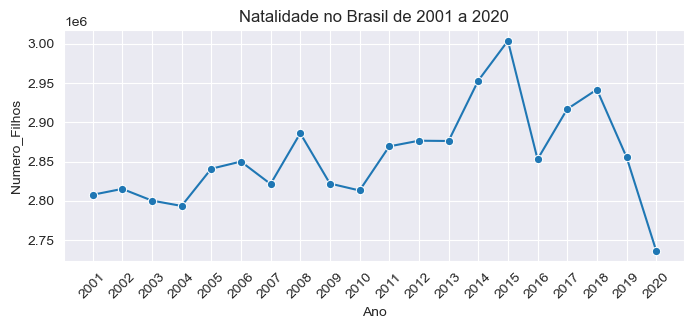

In [3]:
texto1 = ''' \nA Natalidade no Brasil de 2001 até 2020 vinha crescendo até ano de 2015 e a partir daí assumiu uma tendência de queda.\n'''
print(texto1)
print('Fig.1')
nascimentos = tabelas.groupby('Ano',)['Numero_Filhos'].sum().reset_index()
plt.figure(figsize=(8,3))
sns.lineplot(data=nascimentos, x='Ano', y='Numero_Filhos',marker='o')
plt.xticks(rotation=45)
plt.title('Natalidade no Brasil de 2001 a 2020')
plt.show()

 
O Número de filhos de mães com idade entre 31 e 40 anos vem crescendo.
Já as mães mais jovens com até 20 anos vem dimuindo desde 2001 quando iníciamos a análise.
As demais faixas etárias se mantém sem grandes oscilações.
 
Fig.2


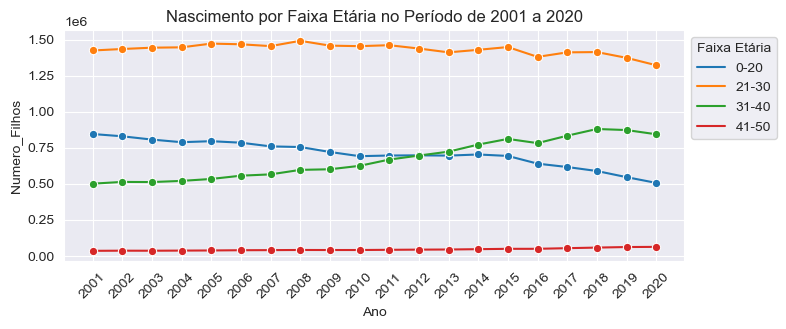

In [4]:
texto2 = ''' \nO Número de filhos de mães com idade entre 31 e 40 anos vem crescendo.
Já as mães mais jovens com até 20 anos vem dimuindo desde 2001 quando iníciamos a análise.
As demais faixas etárias se mantém sem grandes oscilações.\n '''
print(texto2)
print('Fig.2')
nascimentos_faixa = tabelas.groupby(['Ano','Faixa_Etaria'])['Numero_Filhos'].sum().reset_index()
plt.figure(figsize=(8,3))
sns.lineplot(data=nascimentos_faixa, x='Ano', y='Numero_Filhos', hue='Faixa_Etaria',marker='o')
plt.xticks(rotation=45)
plt.title('Nascimento por Faixa Etária no Período de 2001 a 2020')
plt.legend(title='Faixa Etária',bbox_to_anchor=(1, 1))
plt.show()

 
Análise de ocorrência de Sindrome de Down no periodo de 2001 a 2020.
Tem se mantido entre 800 e 1000 casos anuais com uma mediana perto de 900 ocorrências.

Fig.3


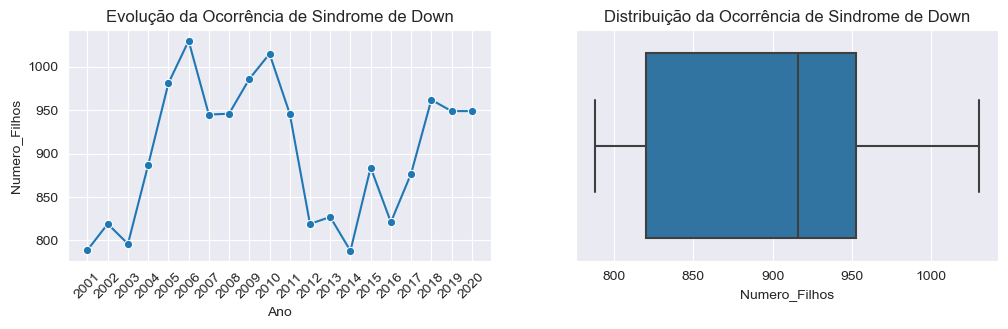

In [5]:
texto3 = ''' \nAnálise de ocorrência de Sindrome de Down no periodo de 2001 a 2020.
Tem se mantido entre 800 e 1000 casos anuais com uma mediana perto de 900 ocorrências.\n'''
print(texto3)
print('Fig.3')
tabelas_down = tabelas.groupby(['Ano','Situacao'])['Numero_Filhos'].sum().reset_index()
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.lineplot(data=tabelas_down.query("Situacao=='Anomalia com SD'"), x='Ano', y='Numero_Filhos',marker='o')
plt.xticks(rotation=45)
plt.title('Evolução da Ocorrência de Sindrome de Down')
plt.subplot(122)
sns.boxplot(data=tabelas_down.query("Situacao=='Anomalia com SD'"), x='Numero_Filhos')
plt.title('Distribuição da Ocorrência de Sindrome de Down')
plt.show()



Seguindo a tendência de crescimento, a quantidade de parto cesária ultrapassou os partos normais em 2008
e se manteve muito acima da quantidade de partos normais no período analisado.

FIG.4


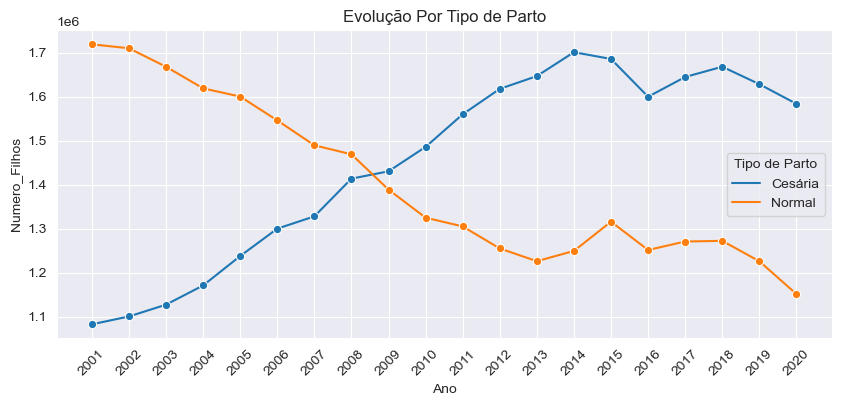

In [6]:
texto4 ='''\nSeguindo a tendência de crescimento, a quantidade de parto cesária ultrapassou os partos normais em 2008
e se manteve muito acima da quantidade de partos normais no período analisado.\n'''
print(texto4)
print('FIG.4')
plt.figure(figsize=(10,4))
tipo_parto = tabelas.groupby(['Ano','Tipo_Parto'])['Numero_Filhos'].sum().reset_index()
sns.lineplot(data=tipo_parto.query("Tipo_Parto=='Cesária' or Tipo_Parto=='Normal'"),
             x='Ano',y='Numero_Filhos', hue='Tipo_Parto',marker='o')
plt.legend(title='Tipo de Parto')
plt.title('Evolução Por Tipo de Parto')
plt.xticks(rotation=45)
plt.show()



No tipo de parto de crianças com Sindrome de Down é possivel presumir que os médicos já priorizavam 
o parto cirúrgico de crianças com SD, uma vez que, com base no gráfico da figura 4, apenas em 2008 o 
número de cesárias ultrapassou o de partos normais. Já neste gráfico podemos observar que as cesárias
já eram maioria desde 2004. Vide fig.5.

FIG.5


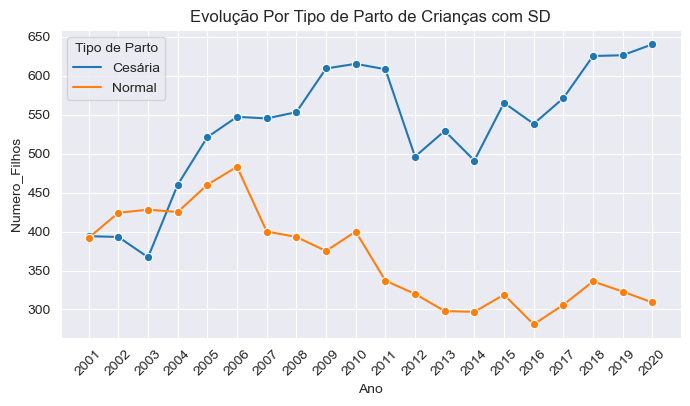

In [7]:
texto5='''\nNo tipo de parto de crianças com Sindrome de Down é possivel presumir que os médicos já priorizavam 
o parto cirúrgico de crianças com SD, uma vez que, com base no gráfico da figura 4, apenas em 2008 o 
número de cesárias ultrapassou o de partos normais. Já neste gráfico podemos observar que as cesárias
já eram maioria desde 2004. Vide fig.5.\n'''
print(texto5)
print('FIG.5')
plt.figure(figsize=(8,4))
tipo_parto = tabelas.query("Situacao=='Anomalia com SD'")
tipo_parto = tipo_parto.groupby(['Ano','Tipo_Parto'])['Numero_Filhos'].sum().reset_index()
sns.lineplot(data=tipo_parto.query("Tipo_Parto=='Cesária' or Tipo_Parto=='Normal'"),
             x='Ano',y='Numero_Filhos', hue='Tipo_Parto',marker='o')
plt.legend(title='Tipo de Parto')
plt.title('Evolução Por Tipo de Parto de Crianças com SD')
plt.xticks(rotation=45)
plt.show()

 
Na idade média das mães por tipo de parto, podemos observar no gráfico que a idade média das mãe de crianças com SD
é bem mais alta que a das demais mães, o que pode indicar que quanto mais alta a idade da mãe, maior a possibilidade de o filho
nascer com Sindrome de Down.

FIG.6


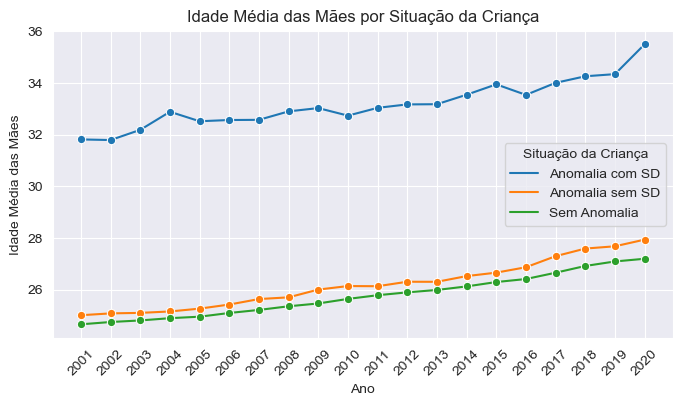

In [8]:
texto6 = ''' \nNa idade média das mães por tipo de parto, podemos observar no gráfico que a idade média das mãe de crianças com SD
é bem mais alta que a das demais mães, o que pode indicar que quanto mais alta a idade da mãe, maior a possibilidade de o filho
nascer com Sindrome de Down.\n'''
print(texto6)
print('FIG.6')
plt.figure(figsize=(8,4))
idade_media_mae = tabelas.groupby(['Ano','Situacao'])['Idade_Mae'].mean().reset_index()
sns.lineplot(data=idade_media_mae, x='Ano',y='Idade_Mae', hue='Situacao',marker='o')
plt.title('Idade Média das Mães por Situação da Criança')
plt.legend(title='Situação da Criança')
plt.ylabel('Idade Média das Mães')
plt.xticks(rotation=45)
plt.show()


O peso médio das crianças com alguma ocorrência de anomalia detectada, apresenta um peso médio abaixo de 2.900g,
enquanto que as crianças sem nenhuma ocorrência apresentam peso acima de 3.150g. Pode evidenciar uma relação com a questão do parto
cesáriana, mas é preciso mais evidências para afirmar isto. Vide Fig. 7.

FIG.7


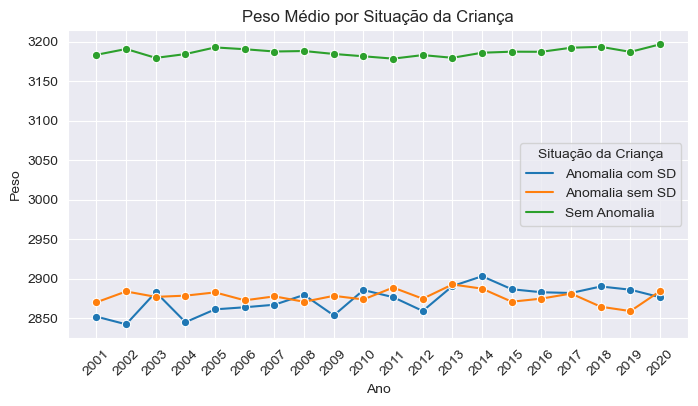

In [9]:
texto7='''\nO peso médio das crianças com alguma ocorrência de anomalia detectada, apresenta um peso médio abaixo de 2.900g,
enquanto que as crianças sem nenhuma ocorrência apresentam peso acima de 3.150g. Pode evidenciar uma relação com a questão do parto
cesáriana, mas é preciso mais evidências para afirmar isto. Vide Fig. 7.\n'''
print(texto7)
print('FIG.7')
plt.figure(figsize=(8,4))

peso_medio = tabelas.groupby(['Ano','Situacao'])['Peso'].mean().reset_index()
sns.lineplot(data=peso_medio,x='Ano',y='Peso', hue='Situacao',marker='o')
plt.legend(title='Situação da Criança')
plt.title('Peso Médio por Situação da Criança')
plt.xticks(rotation=45)
plt.show()